# Parsing Lidar Data

Importing necessary libraries

In [2]:
import pandas as pd
from io import  StringIO

Reading lidar log file to panda dataframe

In [28]:
with open("data/lidar_log_grilstad_22.09.22_10_00_13_00.txt") as f:
    text_lidar_data = f.read().strip('\\"')
raw_lidar_data = pd.read_csv(
    StringIO(text_lidar_data),
    sep=" ",
    engine="python",
    quoting=3,
    on_bad_lines="warn",
    header=None,
)
raw_lidar_data


Skipping line 300: Expected 48 fields in line 300, saw 51
Skipping line 301: Expected 48 fields in line 301, saw 51
Skipping line 344: Expected 48 fields in line 344, saw 51
Skipping line 345: Expected 48 fields in line 345, saw 51
Skipping line 354: Expected 48 fields in line 354, saw 51
Skipping line 355: Expected 48 fields in line 355, saw 51
Skipping line 794: Expected 48 fields in line 794, saw 51
Skipping line 795: Expected 48 fields in line 795, saw 51
Skipping line 1068: Expected 48 fields in line 1068, saw 51
Skipping line 1069: Expected 48 fields in line 1069, saw 51
Skipping line 1070: Expected 48 fields in line 1070, saw 51
Skipping line 1071: Expected 48 fields in line 1071, saw 51
Skipping line 1212: Expected 48 fields in line 1212, saw 51
Skipping line 1213: Expected 48 fields in line 1213, saw 51
Skipping line 1274: Expected 48 fields in line 1274, saw 51
Skipping line 1275: Expected 48 fields in line 1275, saw 51


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,*D,2,"""*F",2022-09-22,10:00:02.334612,mldcs.VehicleDetector[0],1050,59049,2022-09-22,10:00:02.164,...,-80,283,155,0,0,"\""\""",1,20,"\""vehicle.num_scan\""",""""
1,*D,2,"""*F",2022-09-22,10:00:02.334740,mldcs.VehicleClassifier[0],48,59049,2022-09-22,10:00:02.164,...,-80,283,155,0,0,"\""\""",1,20,"\""vehicle.num_scan\""",""""
2,*D,2,"""*F",2022-09-22,10:00:11.775770,mldcs.VehicleDetector[0],1050,59049,2022-09-22,10:00:11.604,...,-80,336,159,0,0,"\""\""",1,20,"\""vehicle.num_scan\""",""""
3,*D,2,"""*F",2022-09-22,10:00:11.775891,mldcs.VehicleClassifier[0],48,59049,2022-09-22,10:00:11.604,...,-80,336,159,0,0,"\""\""",1,20,"\""vehicle.num_scan\""",""""
4,*D,2,"""*F",2022-09-22,10:00:49.176449,mldcs.VehicleDetector[0],1050,59049,2022-09-22,10:00:49.006,...,-80,290,199,0,0,"\""\""",1,20,"\""vehicle.num_scan\""",""""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,*D,2,"""*F",2022-09-22,12:59:35.928279,mldcs.VehicleClassifier[0],48,59049,2022-09-22,12:59:35.757,...,-80,308,199,0,0,"\""\""",1,20,"\""vehicle.num_scan\""",""""
1268,*D,2,"""*F",2022-09-22,12:59:38.475442,mldcs.VehicleDetector[0],1050,59049,2022-09-22,12:59:38.304,...,-80,277,254,0,0,"\""\""",1,20,"\""vehicle.num_scan\""",""""
1269,*D,2,"""*F",2022-09-22,12:59:38.475556,mldcs.VehicleClassifier[0],48,59049,2022-09-22,12:59:38.304,...,-80,277,254,0,0,"\""\""",1,20,"\""vehicle.num_scan\""",""""
1270,*D,2,"""*F",2022-09-22,12:59:45.981743,mldcs.VehicleDetector[0],1050,59049,2022-09-22,12:59:45.811,...,-80,312,170,0,0,"\""\""",1,20,"\""vehicle.num_scan\""",""""


Parsing table with the following structure

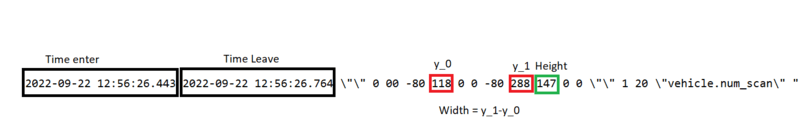

In [41]:
from datetime import timedelta


lidar_data = raw_lidar_data.filter([5, 27, 28, 29, 30, 35, 39, 40])
lidar_data.rename(
    columns=(
        {
            27: "time_enter_date",
            28: "time_enter_time",
            29: "time_leave_date",
            30: "time_leave_time",
            35: "y0",
            39: "y1",
            40: "height",
        }
    ),
    inplace=True,
)
lidar_data["datetime_enter"] = pd.to_datetime(
    lidar_data["time_enter_date"] + " " + lidar_data["time_enter_time"]
)
lidar_data["datetime_leave"] = pd.to_datetime(
    lidar_data["time_leave_date"] + " " + lidar_data["time_leave_time"]
)
lidar_data.drop(
    ["time_enter_date", "time_enter_time", "time_leave_date", "time_leave_time"],
    axis=1,
    inplace=True,
)
lidar_data["width"] = lidar_data["y1"] - lidar_data["y0"]
lidar_data = lidar_data[lidar_data[5] == "mldcs.VehicleDetector[0]"]
lidar_data["duration"] = lidar_data["datetime_leave"] - lidar_data["datetime_enter"]
lidar_data


,5,y0,y1,height,datetime_enter,datetime_leave,width,duration
0,mldcs.VehicleDetector[0],120,283,155,2022-09-22 10:00:01.709,2022-09-22 10:00:02.164,163,0 days 00:00:00.455000
2,mldcs.VehicleDetector[0],168,336,159,2022-09-22 10:00:11.324,2022-09-22 10:00:11.604,168,0 days 00:00:00.280000
4,mldcs.VehicleDetector[0],118,290,199,2022-09-22 10:00:48.591,2022-09-22 10:00:49.006,172,0 days 00:00:00.415000
6,mldcs.VehicleDetector[0],350,500,168,2022-09-22 10:01:00.752,2022-09-22 10:01:01.206,150,0 days 00:00:00.454000
8,mldcs.VehicleDetector[0],120,279,161,2022-09-22 10:01:15.099,2022-09-22 10:01:15.419,159,0 days 00:00:00.320000
...,...,...,...,...,...,...,...,...
1262,mldcs.VehicleDetector[0],65,314,341,2022-09-22 12:59:27.864,2022-09-22 12:59:29.957,249,0 days 00:00:02.093000
1264,mldcs.VehicleDetector[0],137,302,161,2022-09-22 12:59:32.650,2022-09-22 12:59:33.010,165,0 days 00:00:00.360000
1266,mldcs.VehicleDetector[0],134,308,199,2022-09-22 12:59:35.330,2022-09-22 12:59:35.757,174,0 days 00:00:00.427000
1268,mldcs.VehicleDetector[0],89,277,254,2022-09-22 12:59:37.770,2022-09-22 12:59:38.304,188,0 days 00:00:00.534000
